In [4]:
import numpy as np


ew_d2 = 0.42
ew_d2_err = 0.02
ew_d1 = 0.31
ew_d1_err = 0.03


log_ebv_d2 = 2.16 * ew_d2 - 1.91
ebv_d2 = 10**log_ebv_d2


log_ebv_d2_err = np.sqrt((2.16 * ew_d2_err)**2 + (0.15)**2)
ebv_d2_err = ebv_d2 * log_ebv_d2_err * np.log(10)


log_ebv_d1 = 2.47 * ew_d1 - 1.76
ebv_d1 = 10**log_ebv_d1


log_ebv_d1_err = np.sqrt((2.47 * ew_d1_err)**2 + (0.17)**2)
ebv_d1_err = ebv_d1 * log_ebv_d1_err * np.log(10)


weight_d2 = 1 / ebv_d2_err**2
weight_d1 = 1 / ebv_d1_err**2
ebv_avg = (ebv_d2 * weight_d2 + ebv_d1 * weight_d1) / (weight_d2 + weight_d1)


ebv_avg_err = 1 / np.sqrt(weight_d2 + weight_d1)


print(f"E(B-V) from D2: {ebv_d2:.3f} ± {ebv_d2_err:.3f}")
print(f"E(B-V) from D1: {ebv_d1:.3f} ± {ebv_d1_err:.3f}")
print(f"Weighted Average E(B-V): {ebv_avg:.3f} ± {ebv_avg_err:.3f}")

E(B-V) from D2: 0.099 ± 0.036
E(B-V) from D1: 0.101 ± 0.043
Weighted Average E(B-V): 0.100 ± 0.028


Found 10 spec files.

Exploring: d00.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: 0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


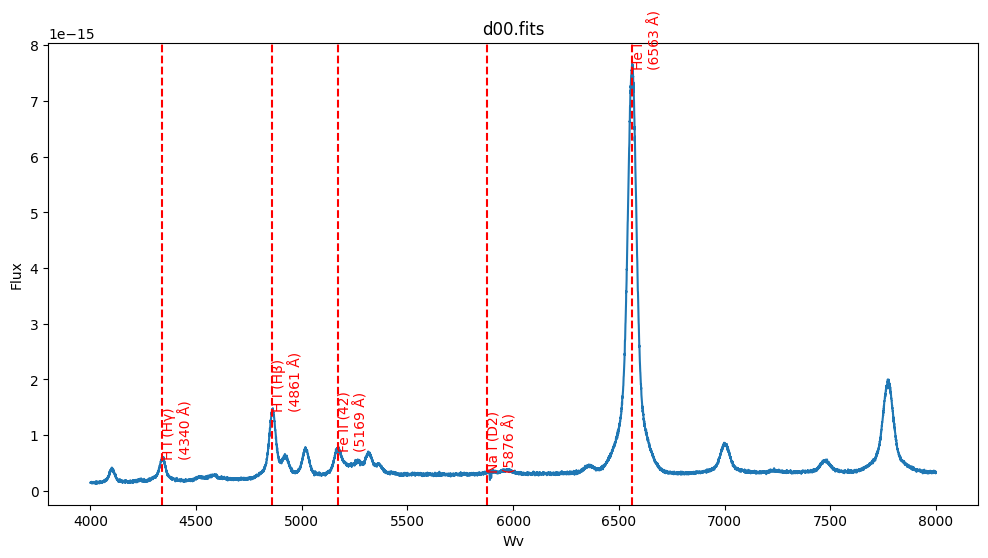


Exploring: d01.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: 0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


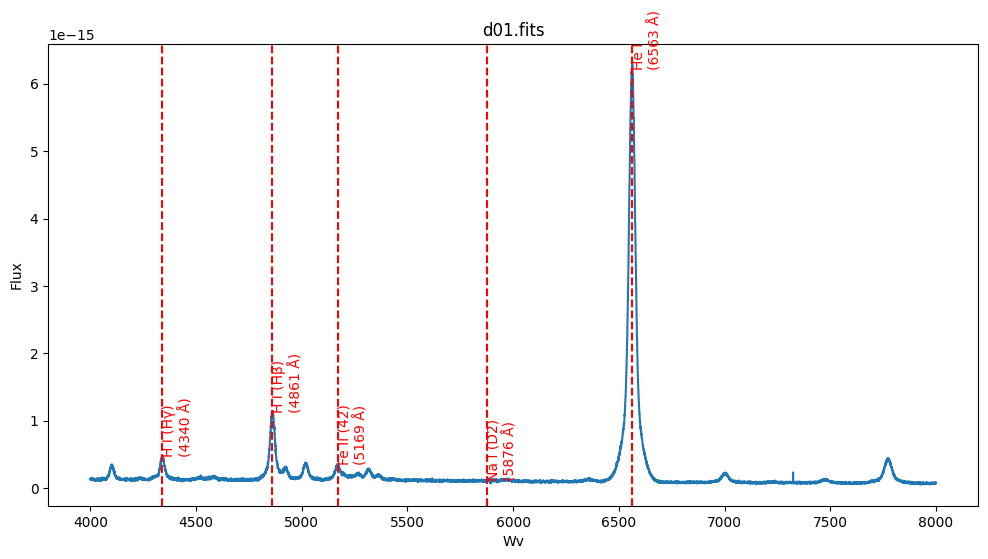


Exploring: d02.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: 0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


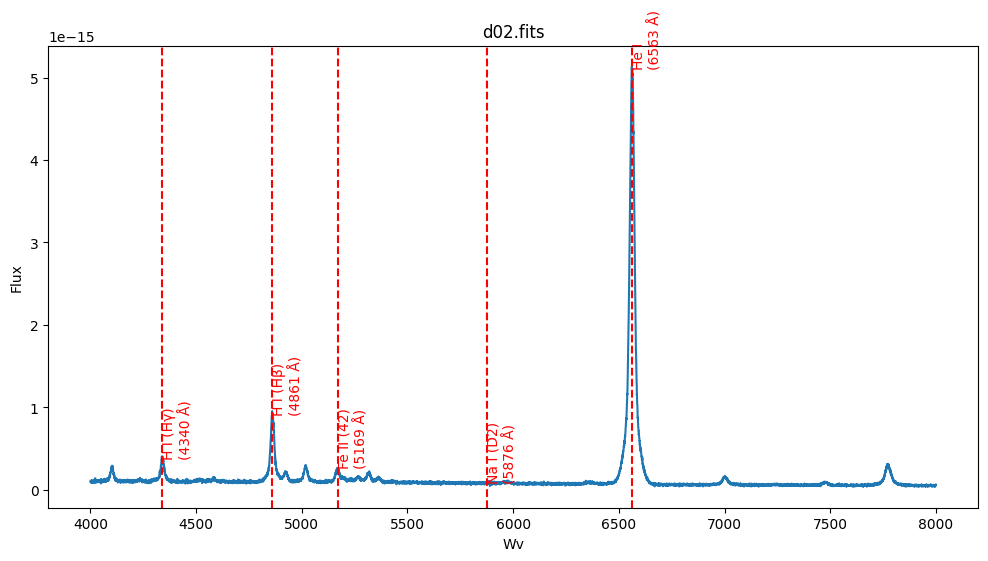


Exploring: d03.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: 0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


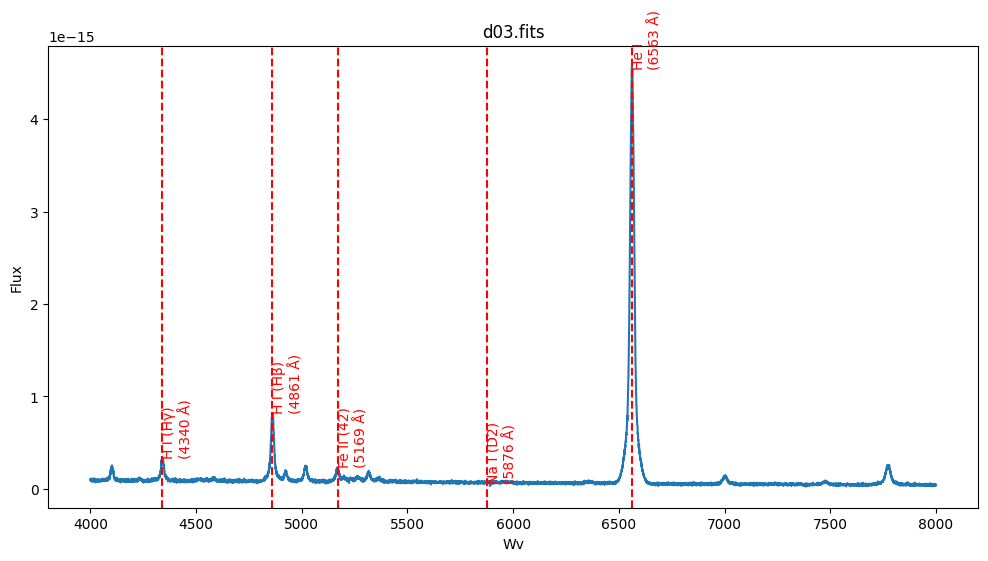


Exploring: d04.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


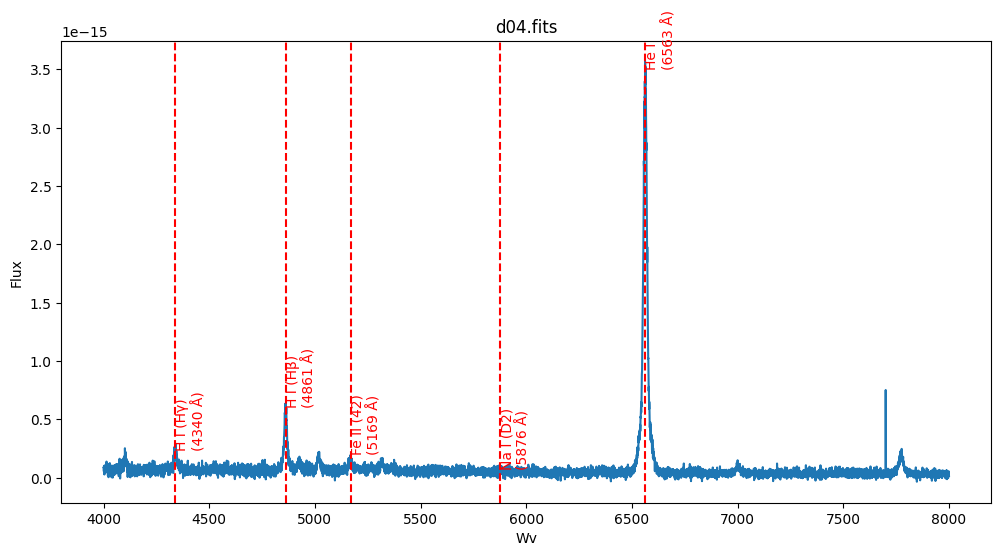


Exploring: d05.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


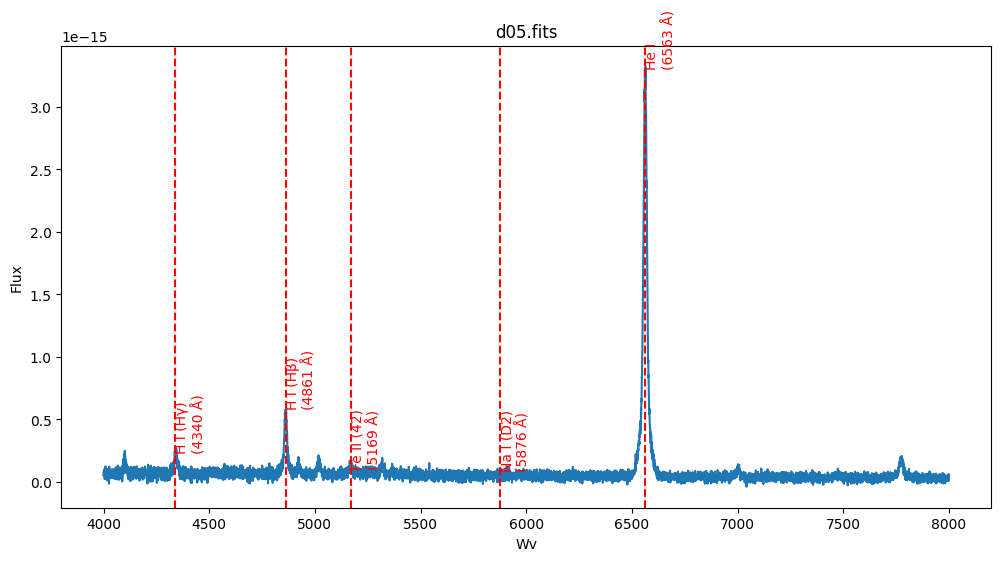


Exploring: d06.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


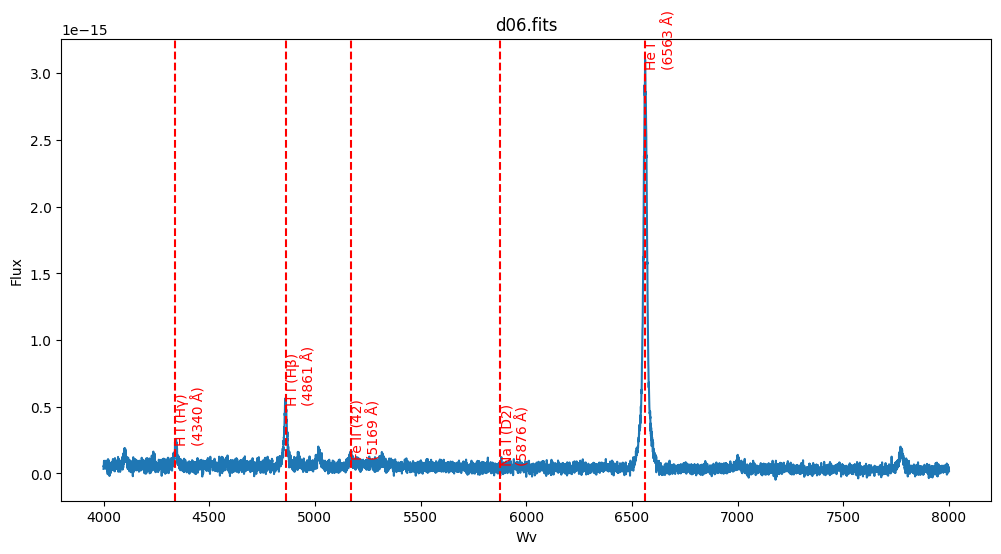


Exploring: d07.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


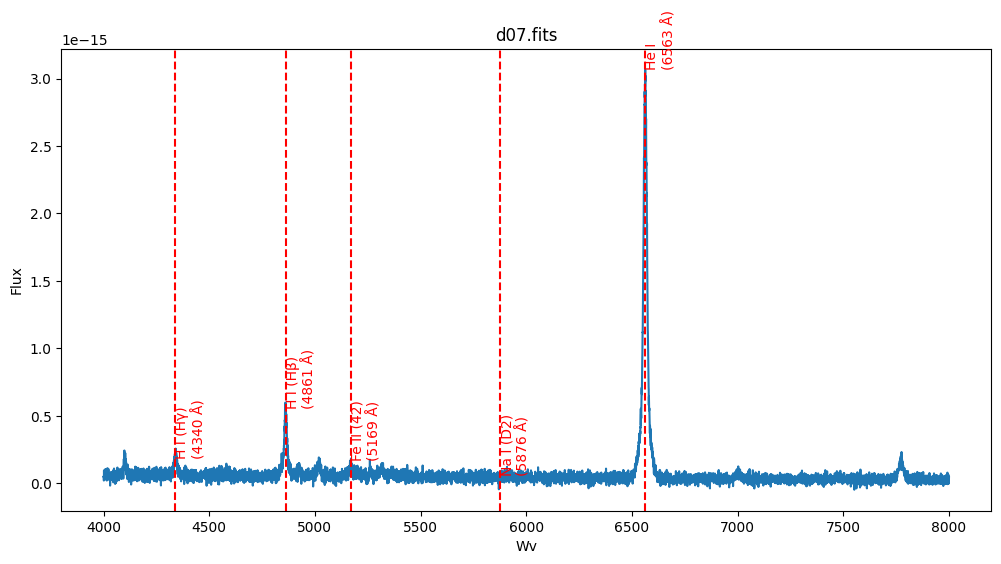


Exploring: d08.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


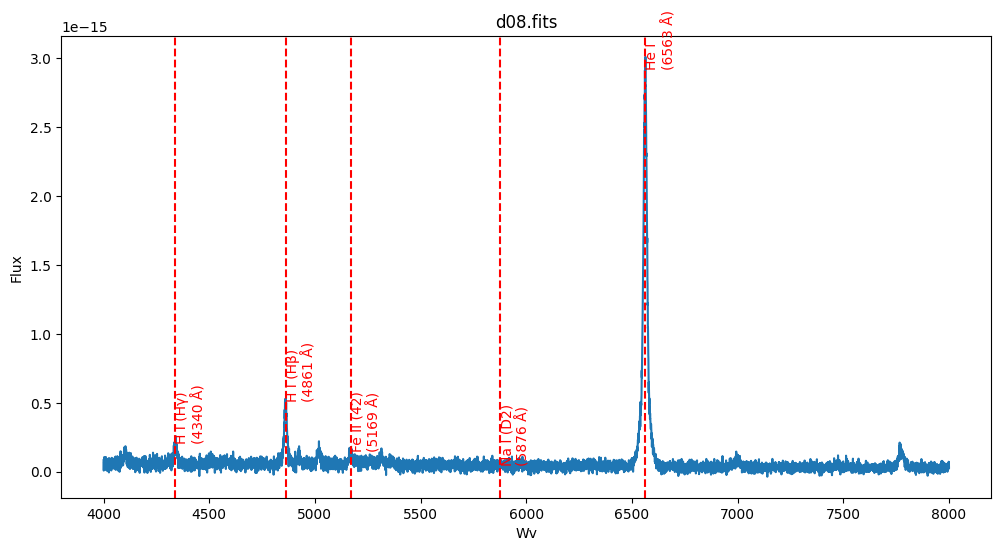


Exploring: d09.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


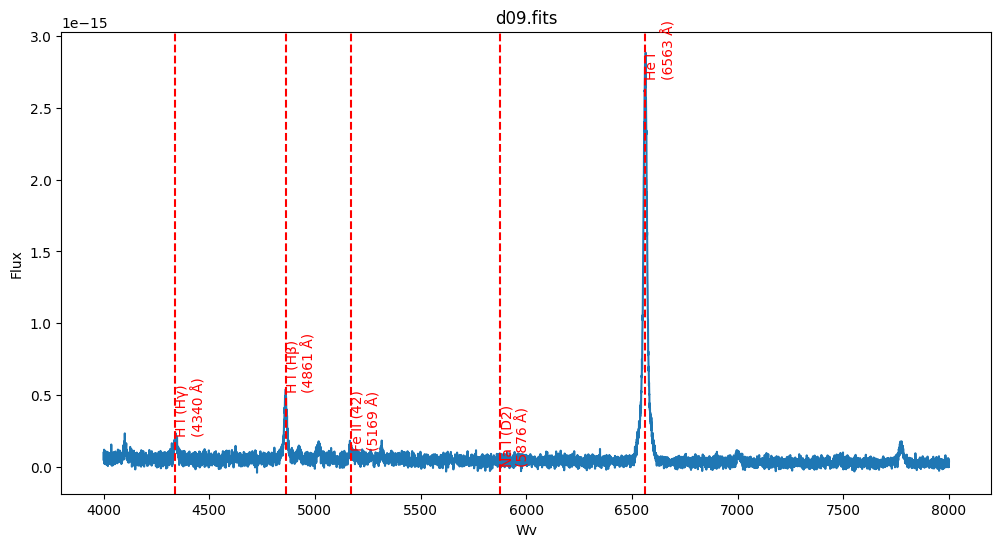

In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

wd = r"C:\Users\friesco\workstation\fr-p\studies\ASTRO716\data_excercise"

def plot_spec(wv, flux, title="Spec", xlabel="Wv", ylabel="Flux", lines=None, line_ids=None, wavelengths=None):
    plt.figure(figsize=(12, 6))
    plt.plot(wv, flux)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if lines:
        for line in lines:
            plt.axvline(x=line, color='r', linestyle='--')
            
            # Find the corresponding line ID
            line_id = "Unknown"  # Default if no match is found
            if wavelengths and line_ids:
                idx = wavelengths.index(line) if line in wavelengths else None
                if idx is not None:
                    line_id = line_ids[idx]

            # Find the nearest flux value for annotation
            idx = (np.abs(wv - line)).argmin()
            plt.text(line, flux[idx], f'{line_id}\n({line} Å)', rotation=90, verticalalignment='bottom', color='r')

    plt.show()

# --- Spectroscopy ---
spec_files = [f for f in os.listdir(wd) if f.startswith('d') and f.endswith('.fits')]
spec_files.sort()

# --- Emission Line Data ---
line_ids = [
    "H I (Hε)", "He I", "H I (Hδ)", "He I", "Fe II (28)", "C III", "He II",
    "Fe II (27)", "C III", "Fe II (28)", "Fe II (27)", "H I (Hγ)", "Fe II (27)",
    "Fe II (27)", "He I", "Fe II (27)", "He I", "He I", "Fe II (37)",
    "Fe II (38)", "Fe II (37)", "N III (3)", "Fe II (38)", "He II", "Fe II (38)",
    "Fe II (37)", "Fe II (38)", "N V (1)", "Fe II (37)", "N III", "He II", "He I",
    "H I (Hβ)", "He I", "Fe II (42)", "N V (1)", "N II (24)", "He I", "Fe II (42)",
    "He I", "Fe II (42)", "Fe II (49)", "Fe II (49)", "Fe II (48)", "O VI (1)",
    "Fe II (48)", "He II", "N II (29)", "Fe II (55)", "N II (3)", "He I", "Na I (D2)",
    "Na I (D1)", "H I (Hα)", "He I", "O I (1)"
]

wavelengths = [
    3970, 4026, 4102, 4144, 4179, 4187, 4200, 4233, 4267, 4297, 4303, 4340,
    4352, 4385, 4388, 4417, 4438, 4471, 4491, 4508, 4515, 4517, 4523, 4542,
    4549, 4556, 4584, 4609, 4629, 4638, 4686, 4713, 4861, 4922, 4924, 4945,
    5001, 5016, 5018, 5048, 5169, 5198, 5235, 5265, 5276, 5292, 5363, 5412,
    5479, 5535, 5679, 5876, 5890, 5896, 6563, 6678, 7773
]

spectral_classes = [
    "Fe II, He/N", "He/N", "Fe II, He/N", "He/N", "Fe II", "He/N", "He/N",
    "Fe II", "He/N", "Fe II", "Fe II", "Fe II, He/N", "Fe II", "Fe II", "He/N",
    "Fe II", "He/N", "He/N", "Fe II", "Fe II", "Fe II", "He/N", "Fe II", "He/N",
    "Fe II", "Fe II", "Fe II", "He/N", "Fe II", "He/N", "He/N", "He/N", "Fe II, He/N",
    "He/N", "Fe II", "He/N", "He/N", "He/N", "Fe II", "He/N", "Fe II", "Fe II",
    "Fe II", "Fe II", "He/N", "Fe II", "He/N", "He/N", "Fe II", "Fe II", "Fe II",
    "He/N", "He/N", "He/N", "Fe II, He/N", "He/N", "Fe II"
]

# Select a few emission lines for demonstration (e.g., H-alpha, H-beta, H-gamma, He I, Fe II)
example_lines = [6563, 4861, 4340, 5876, 5169]  # Wavelengths of the example lines

if spec_files:
    print(f"Found {len(spec_files)} spec files.")
    for f in spec_files:
        path = os.path.join(wd, f)
        try:
            with fits.open(path) as file:
                flux = file[0].data
                if flux.dtype.byteorder == '>':
                    flux = flux.byteswap().view(flux.dtype.newbyteorder('<'))
                hdr = file[0].header
                time_map = {
                    'spec_00': 2.48, 'spec_01': 5.33, 'spec_02': 10.44, 'spec_03': 15.73,
                    'spec_04': 30.23, 'spec_05': 34.71, 'spec_06': 43.55, 'spec_07': 43.58,
                    'spec_08': 48.19, 'spec_09': 59.03
                }
                pre = f.split('.')[0]
                t_obs = time_map.get(pre, 'N/A')
                print(f"\nExploring: {f}")
                print(f"Shape: {flux.shape}, Type: {flux.dtype}, Time: {t_obs}")
                
                # --- Calculate Wavelength ---
                # Get reference wavelength and wavelength step from the header
                crval1 = hdr['CRVAL1']
                cdelt1 = hdr['CDELT1']

                # Create a wavelength array
                n_pix = len(flux)
                wv = crval1 + np.arange(n_pix) * cdelt1
                
                print(f"Min Flux: {np.min(flux):.2f}, Max Flux: {np.max(flux):.2f}, Mean Flux: {np.mean(flux):.2f}, Std Flux: {np.std(flux):.2f}")
                plot_spec(wv, flux, title=f"{f}", lines=example_lines, line_ids=line_ids, wavelengths=wavelengths)
        except Exception as e:
            print(f"Error with {f}: {e}")

Found 10 spec files.

Exploring: 00.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: 0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


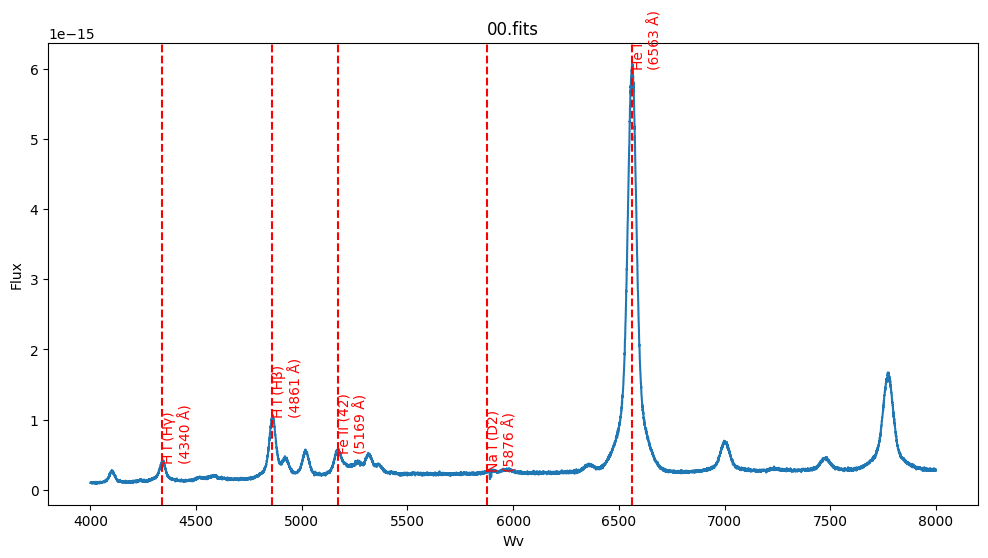


Exploring: 01.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: 0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


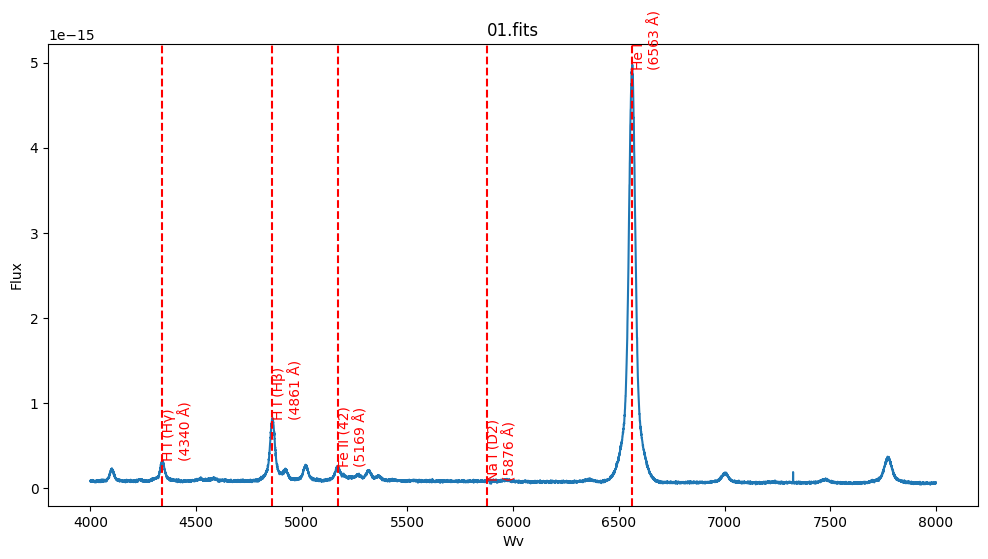


Exploring: 02.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: 0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


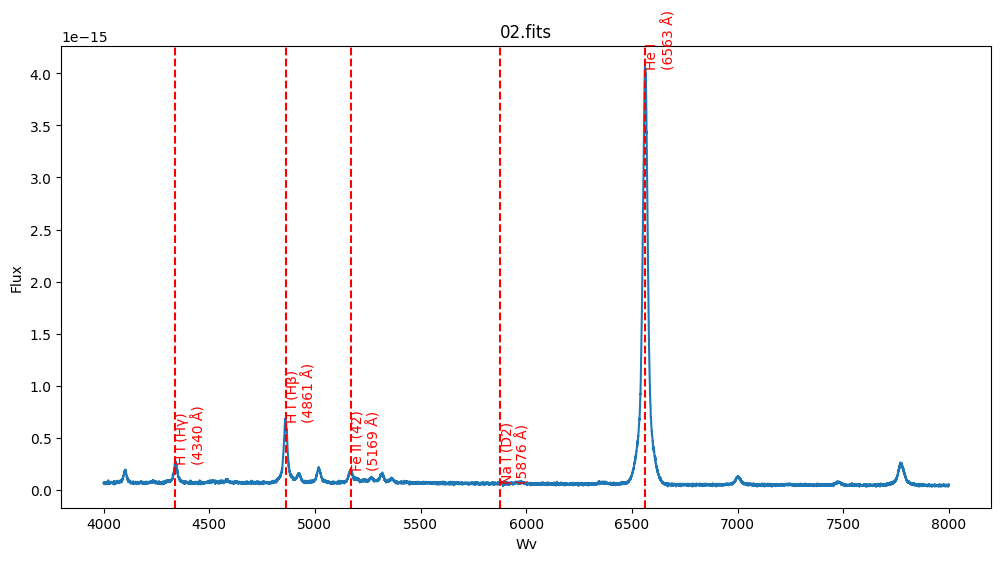


Exploring: 03.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: 0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


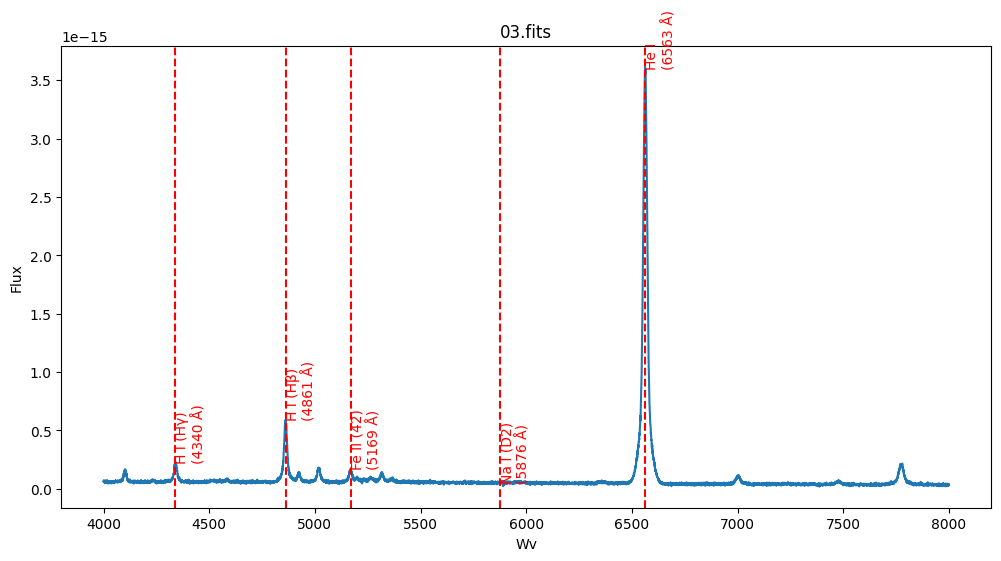


Exploring: 04.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


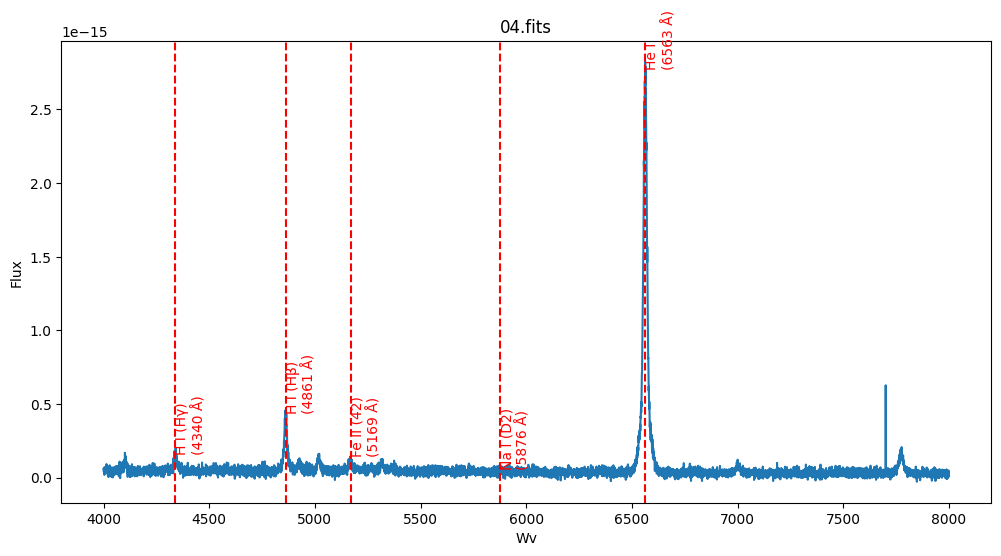


Exploring: 05.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


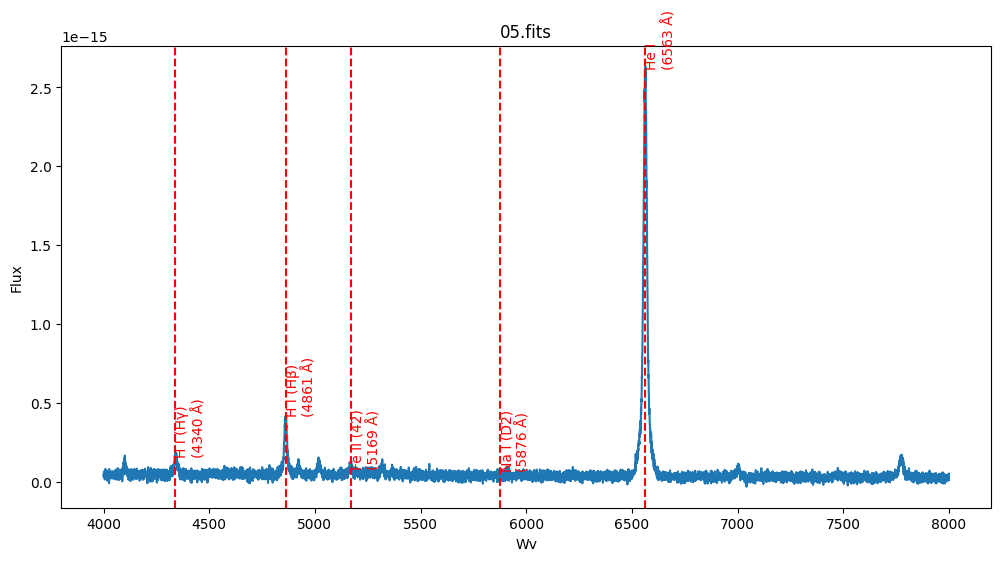


Exploring: 06.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


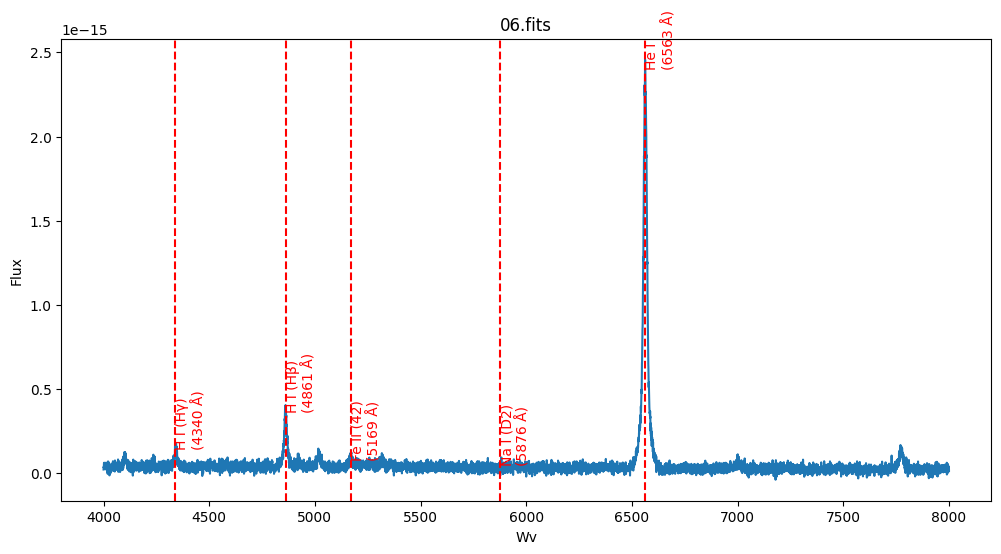


Exploring: 07.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


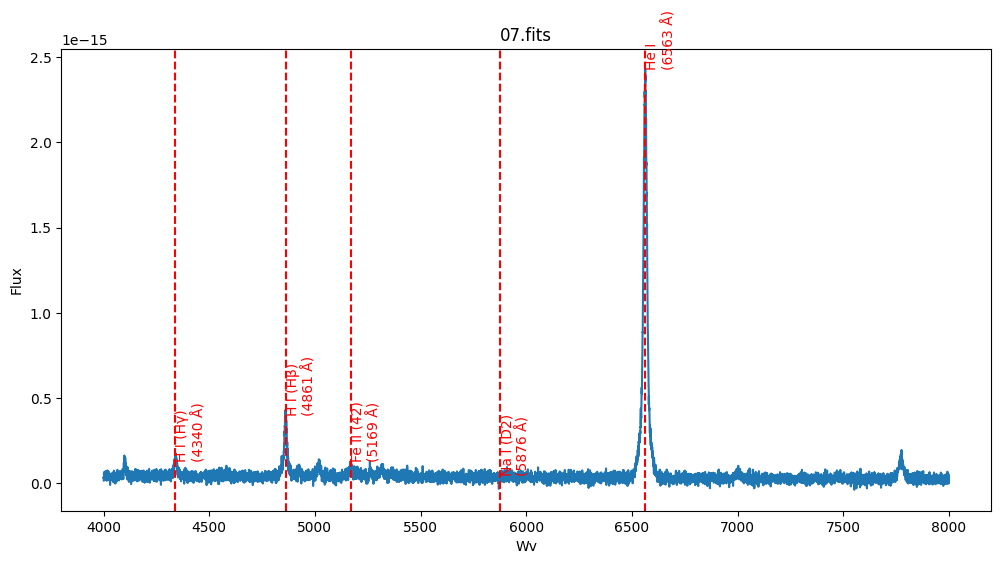


Exploring: 08.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


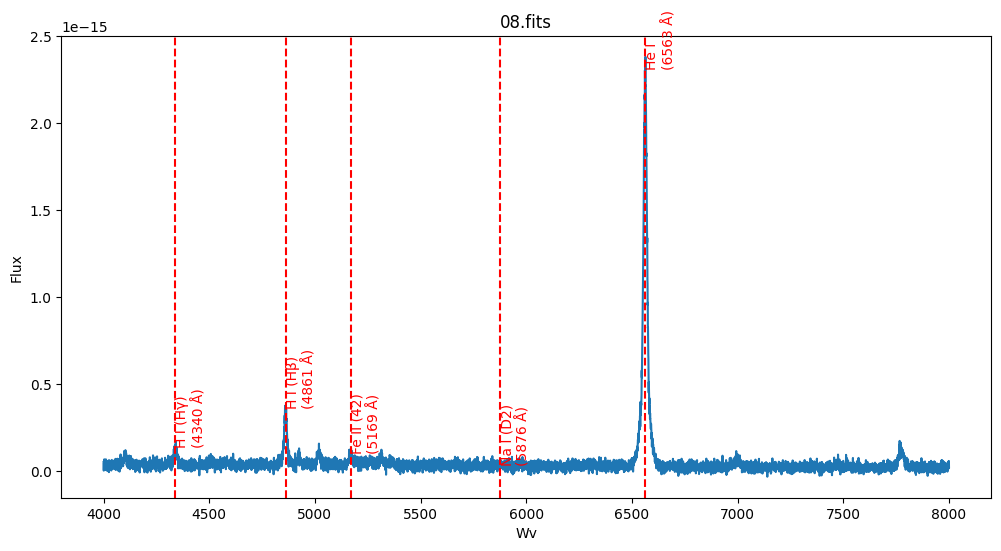


Exploring: 09.fits
Shape: (8000,), Type: float32, Time: N/A
Min Flux: -0.00, Max Flux: 0.00, Mean Flux: 0.00, Std Flux: 0.00


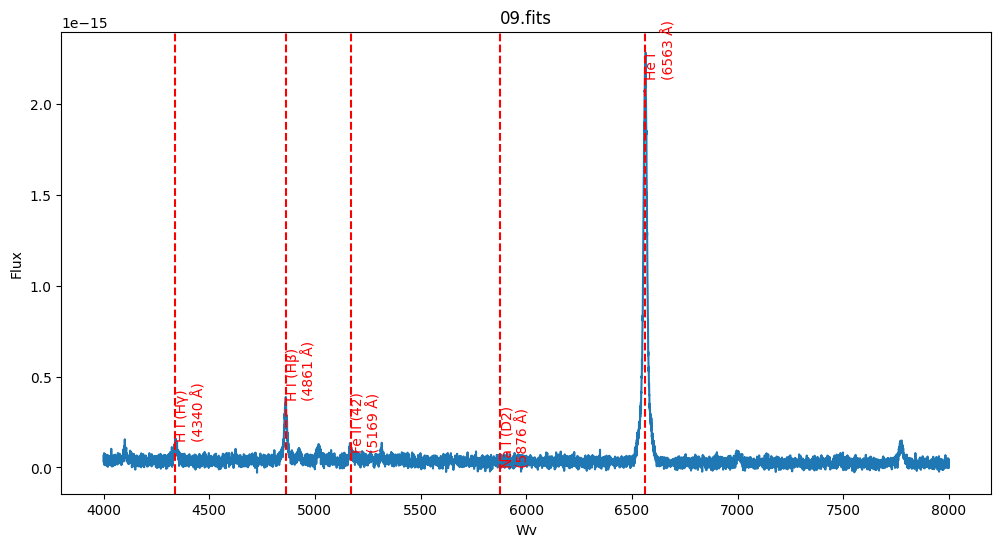

In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

wd = r"C:\Users\friesco\workstation\fr-p\studies\ASTRO716\data_excercise"

def plot_spec(wv, flux, title="Spec", xlabel="Wv", ylabel="Flux", lines=None, line_ids=None, wavelengths=None):
    plt.figure(figsize=(12, 6))
    plt.plot(wv, flux)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if lines:
        for line in lines:
            plt.axvline(x=line, color='r', linestyle='--')
            
            # Find the corresponding line ID
            line_id = "Unknown"  # Default if no match is found
            if wavelengths and line_ids:
                idx = wavelengths.index(line) if line in wavelengths else None
                if idx is not None:
                    line_id = line_ids[idx]

            # Find the nearest flux value for annotation
            idx = (np.abs(wv - line)).argmin()
            plt.text(line, flux[idx], f'{line_id}\n({line} Å)', rotation=90, verticalalignment='bottom', color='r')

    plt.show()

# --- Spectroscopy ---
spec_files = [f for f in os.listdir(wd) if f.startswith('0') and f.endswith('.fits')]
spec_files.sort()

# --- Emission Line Data ---
line_ids = [
    "H I (Hε)", "He I", "H I (Hδ)", "He I", "Fe II (28)", "C III", "He II",
    "Fe II (27)", "C III", "Fe II (28)", "Fe II (27)", "H I (Hγ)", "Fe II (27)",
    "Fe II (27)", "He I", "Fe II (27)", "He I", "He I", "Fe II (37)",
    "Fe II (38)", "Fe II (37)", "N III (3)", "Fe II (38)", "He II", "Fe II (38)",
    "Fe II (37)", "Fe II (38)", "N V (1)", "Fe II (37)", "N III", "He II", "He I",
    "H I (Hβ)", "He I", "Fe II (42)", "N V (1)", "N II (24)", "He I", "Fe II (42)",
    "He I", "Fe II (42)", "Fe II (49)", "Fe II (49)", "Fe II (48)", "O VI (1)",
    "Fe II (48)", "He II", "N II (29)", "Fe II (55)", "N II (3)", "He I", "Na I (D2)",
    "Na I (D1)", "H I (Hα)", "He I", "O I (1)"
]

wavelengths = [
    3970, 4026, 4102, 4144, 4179, 4187, 4200, 4233, 4267, 4297, 4303, 4340,
    4352, 4385, 4388, 4417, 4438, 4471, 4491, 4508, 4515, 4517, 4523, 4542,
    4549, 4556, 4584, 4609, 4629, 4638, 4686, 4713, 4861, 4922, 4924, 4945,
    5001, 5016, 5018, 5048, 5169, 5198, 5235, 5265, 5276, 5292, 5363, 5412,
    5479, 5535, 5679, 5876, 5890, 5896, 6563, 6678, 7773
]

spectral_classes = [
    "Fe II, He/N", "He/N", "Fe II, He/N", "He/N", "Fe II", "He/N", "He/N",
    "Fe II", "He/N", "Fe II", "Fe II", "Fe II, He/N", "Fe II", "Fe II", "He/N",
    "Fe II", "He/N", "He/N", "Fe II", "Fe II", "Fe II", "He/N", "Fe II", "He/N",
    "Fe II", "Fe II", "Fe II", "He/N", "Fe II", "He/N", "He/N", "He/N", "Fe II, He/N",
    "He/N", "Fe II", "He/N", "He/N", "He/N", "Fe II", "He/N", "Fe II", "Fe II",
    "Fe II", "Fe II", "He/N", "Fe II", "He/N", "He/N", "Fe II", "Fe II", "Fe II",
    "He/N", "He/N", "He/N", "Fe II, He/N", "He/N", "Fe II"
]

# Select a few emission lines for demonstration (e.g., H-alpha, H-beta, H-gamma, He I, Fe II)
example_lines = [6563, 4861, 4340, 5876, 5169]  # Wavelengths of the example lines

if spec_files:
    print(f"Found {len(spec_files)} spec files.")
    for f in spec_files:
        path = os.path.join(wd, f)
        try:
            with fits.open(path) as file:
                flux = file[0].data
                if flux.dtype.byteorder == '>':
                    flux = flux.byteswap().view(flux.dtype.newbyteorder('<'))
                hdr = file[0].header
                time_map = {
                    'spec_00': 2.48, 'spec_01': 5.33, 'spec_02': 10.44, 'spec_03': 15.73,
                    'spec_04': 30.23, 'spec_05': 34.71, 'spec_06': 43.55, 'spec_07': 43.58,
                    'spec_08': 48.19, 'spec_09': 59.03
                }
                pre = f.split('.')[0]
                t_obs = time_map.get(pre, 'N/A')
                print(f"\nExploring: {f}")
                print(f"Shape: {flux.shape}, Type: {flux.dtype}, Time: {t_obs}")
                
                # --- Calculate Wavelength ---
                # Get reference wavelength and wavelength step from the header
                crval1 = hdr['CRVAL1']
                cdelt1 = hdr['CDELT1']

                # Create a wavelength array
                n_pix = len(flux)
                wv = crval1 + np.arange(n_pix) * cdelt1
                
                print(f"Min Flux: {np.min(flux):.2f}, Max Flux: {np.max(flux):.2f}, Mean Flux: {np.mean(flux):.2f}, Std Flux: {np.std(flux):.2f}")
                plot_spec(wv, flux, title=f"{f}", lines=example_lines, line_ids=line_ids, wavelengths=wavelengths)
        except Exception as e:
            print(f"Error with {f}: {e}")

In [7]:
import numpy as np


distance_modulus_original = 15.0  
distance_modulus_original_err = 0.5

ebv = 0.100  # Corrected E(B-V) value
ebv_err = 0.028  # Uncertainty in E(B-V)


Ar_to_EBV = 2.751  


Ar = Ar_to_EBV * ebv
Ar_err = Ar_to_EBV * ebv_err


distance_modulus_corrected = distance_modulus_original + Ar
distance_modulus_corrected_err = np.sqrt(distance_modulus_original_err**2 + Ar_err**2)


distance = 10**((distance_modulus_corrected / 5) + 1)


distance_err = 0.461 * distance_modulus_corrected_err * distance


print("Original Distance Modulus: {:.3f} ± {:.3f} mag".format(distance_modulus_original, distance_modulus_original_err))
print("A_r': {:.3f} ± {:.3f} mag".format(Ar, Ar_err))
print("Corrected Distance Modulus: {:.3f} ± {:.3f} mag".format(distance_modulus_corrected, distance_modulus_corrected_err))
print("Distance: {:.0f} ± {:.0f} pc".format(distance, distance_err))

Original Distance Modulus: 15.000 ± 0.500 mag
A_r': 0.275 ± 0.077 mag
Corrected Distance Modulus: 15.275 ± 0.506 mag
Distance: 11351 ± 2647 pc


In [8]:
# Recalculating to ensure no errors

# Define constants and variables
m_v = 7.0  # Apparent magnitude during nova peak
M_v_typical = -7.5  # Typical absolute magnitude for a nova eruption
R_v = 3.1  # Reddening coefficient
E_BV = 0.100  # Color excess (reddening)
E_BV_err = 0.028  # Uncertainty in E(B-V)

# Calculate A_V and its uncertainty
A_v = R_v * E_BV
A_v_err = R_v * E_BV_err

# Calculate the distance using the extinction-corrected formula
distance_pc = 10 ** ((m_v - M_v_typical + 5 - A_v) / 5)

# Calculate the uncertainty in the distance (propagation of error)
log_term_err = A_v_err / 5  # Contribution from A_V uncertainty to the logarithmic term
distance_err_pc = distance_pc * np.log(10) * log_term_err

# Results
distance_pc, distance_err_pc, A_v, A_v_err


(6886.522963442762,
 np.float64(275.27413685168267),
 0.31000000000000005,
 0.0868)

In [9]:
import numpy as np

# --- Input Values ---
m_v = 7.0        # Apparent V magnitude at peak (replace with a more precise value if available)
m_v_err = 0.5    # Uncertainty in m_v (example value, use your actual uncertainty if available)
M_v_typical = -7.5  # Typical absolute V magnitude for a nova eruption
M_v_spread = 1.5   # Approximate spread in M_v for novae (about -6 to -9, so a spread of 3, we take half for uncertainty)
R_v = 3.1         # Reddening coefficient (typical value for diffuse interstellar medium)
E_BV = 0.100       # Color excess (reddening)
E_BV_err = 0.028   # Uncertainty in E(B-V)

# --- Calculations ---

# 1. Calculate A_V and its uncertainty
A_v = R_v * E_BV
A_v_err = R_v * E_BV_err

# 2. Calculate the distance using the extinction-corrected formula
distance_pc = 10**((m_v - M_v_typical + 5 - A_v) / 5)

# 3. Calculate the uncertainty in the distance (propagation of error)
# We'll consider uncertainties in m_v, A_v, and the spread in M_v_typical
log_term_err = np.sqrt((m_v_err / 5)**2 + (A_v_err / 5)**2 + (M_v_spread / 5)**2)
distance_err_pc = distance_pc * np.log(10) * log_term_err

# --- Print Results ---
print("A_V: {:.3f} ± {:.3f} mag".format(A_v, A_v_err))
print("Distance: {:.0f} ± {:.0f} pc".format(distance_pc, distance_err_pc))

A_V: 0.310 ± 0.087 mag
Distance: 6887 ± 5022 pc


In [10]:
import numpy as np

distance_original = 4177083.25 
distance_modulus_original_err = 1.5  

ebv = 0.100 
ebv_err = 0.028  


Ar_to_EBV = 2.751 

distance_modulus_original = 5 * np.log10(distance_original) - 5


Ar = Ar_to_EBV * ebv
Ar_err = Ar_to_EBV * ebv_err


distance_modulus_corrected = distance_modulus_original + Ar
distance_modulus_corrected_err = np.sqrt(distance_modulus_original_err**2 + Ar_err**2)


distance = 10**((distance_modulus_corrected / 5) + 1)


distance_err = 0.461 * distance_modulus_corrected_err * distance


print("Original Distance: {:.0f} pc".format(distance_original))
print("Original Distance Modulus: {:.3f} ± {:.3f} mag".format(distance_modulus_original, distance_modulus_original_err))
print("A_r': {:.3f} ± {:.3f} mag".format(Ar, Ar_err))
print("Corrected Distance Modulus: {:.3f} ± {:.3f} mag".format(distance_modulus_corrected, distance_modulus_corrected_err))
print("Updated Distance: {:.0f} ± {:.0f} pc".format(distance, distance_err))

Original Distance: 4177083 pc
Original Distance Modulus: 28.104 ± 1.500 mag
A_r': 0.275 ± 0.077 mag
Corrected Distance Modulus: 28.379 ± 1.502 mag
Updated Distance: 4741253 ± 3282896 pc
